# Sentiment Analysis with Neural Network and Word2Vec

### Data source : IMDB Movie Reviews
http://ai.stanford.edu/~amaas/data/sentiment/

* 50,000 movie reviews <br>
* 25000 reviews for training and 25000 for testing classifier <br>
* Each set has 12,500 positive and 12,500 negative reviews.

* Import Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tarfile

In [ ]:
tf = tarfile.open('data/S_Classification/aclImdb_v1.tar')

*  tf.extractall(path='data/S_Classification')

In [ ]:
import os

In [ ]:
os.listdir('data/S_Classification/aclImdb/')

In [2]:
import sklearn

* Use load_files module from sklearn to load train and test datasets in memory

In [3]:
from sklearn.datasets import load_files

In [4]:
train_dir = r'data/S_Classification/aclImdb/train'

In [5]:
test_dir = r'data/S_Classification/aclImdb/test'

In [6]:
movies_train = load_files(train_dir, shuffle=False)

In [7]:
movies_test = load_files(test_dir, shuffle=False)

* Check path of filenames

In [8]:
movies_train.filenames

array(['data/S_Classification/aclImdb/train\\neg\\0_3.txt',
       'data/S_Classification/aclImdb/train\\neg\\10000_4.txt',
       'data/S_Classification/aclImdb/train\\neg\\10001_4.txt', ...,
       'data/S_Classification/aclImdb/train\\pos\\999_10.txt',
       'data/S_Classification/aclImdb/train\\pos\\99_8.txt',
       'data/S_Classification/aclImdb/train\\pos\\9_7.txt'], dtype='<U52')

* Check target sentiment label (dependent variable)

In [9]:
movies_train.target

array([0, 0, 0, ..., 1, 1, 1])

* Check target folder names

In [10]:
movies_train.target_names

['neg', 'pos']

* Check length of training data , i.e. 12,500 positive and 12,500 negative. Total = 25,000

In [11]:
len(movies_train.data)

25000

* Check 1st review for training data

In [12]:
movies_train.data[0]

b"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

* Check target label of 1st review , neg = 0 , pos = 1

In [13]:
movies_train.target[0]

0

In [14]:
movies_train.target_names[0]

'neg'

In [8]:
reviews_train = movies_train.data
reviews_test = movies_test.data

* Convert reviews from byte format to string format

In [9]:
reviews_train_str = [str(i, encoding='utf') for i in reviews_train]

In [10]:
reviews_test_str = [str(j, encoding='utf') for j in reviews_test]

## Preprocessing

In [11]:
import re

In [12]:
replace_no_space = re.compile(r"[.;:!\'?,\"()\[\]]") 

In [13]:
replace_with_space = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

* Function to clean the Text data by removing punctuations etc

In [14]:
def preprocess_reviews(reviews):
    reviews = [replace_no_space.sub("", line.lower()) for line in reviews]
    reviews = [replace_with_space.sub(" ", line) for line in reviews]
    
    return reviews

In [15]:
reviews_train_clean = preprocess_reviews(reviews_train_str)

In [16]:
reviews_test_clean = preprocess_reviews(reviews_test_str)

## Normalization


###  Remove Stop Words

In [17]:
from nltk.corpus import stopwords

In [18]:
english_stop_words = stopwords.words('english')

In [19]:
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

In [20]:
no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_test = remove_stop_words(reviews_test_clean)

### Stemming

In [21]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [22]:
def get_stemmed_text(corpus):
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

In [23]:
stemmed_reviews_train = get_stemmed_text(no_stop_words_train)
stemmed_reviews_test = get_stemmed_text(no_stop_words_test)

### Lemmatization

In [24]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
def get_lemmatized_text(corpus):
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

In [26]:
lemmatized_reviews_train = get_lemmatized_text(no_stop_words_train)
lemmatized_reviews_test = get_lemmatized_text(no_stop_words_test)

* Set target_label variable to be 0 for negative reviews(first 12,500) and 1 for positive reviews(last 12,500)

In [27]:
target_label = [0 if i < 12500 else 1 for i in range(25000)]

## Vectorization


### Bag of Words


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

#### ngram

* Add more predictive power to our model by adding two or three word sequences (bigrams or trigrams). <br>
* For example, if a review had the three word sequence “didn’t love movie” we would only consider these words individually with a unigram-only model and probably not capture that this is actually a negative sentiment because the word ‘love’ by itself is going to be highly correlated with a positive review. <br>
* We use unigram and bigram in our analysis with the ngram_range = (1,2)

In [36]:
bow_ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))

* Fit BOW vectorizer on Lemmatized data

In [37]:
bow_ngram_vectorizer.fit(lemmatized_reviews_train)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [38]:
X_bow = bow_ngram_vectorizer.transform(lemmatized_reviews_train)

In [39]:
X_test_bow = bow_ngram_vectorizer.transform(lemmatized_reviews_test)

* Check Vocabulary size and Number of features after BOW Vectorization

In [40]:
print("Vocabulary size: {}".format(len(bow_ngram_vectorizer.vocabulary_)))

Vocabulary size: 1802180


In [41]:
print("Number of features: {}".format(len(bow_ngram_vectorizer.get_feature_names()))) 

Number of features: 1802180


### TF-IDF Vectorization

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf_vectorizer = TfidfVectorizer()

* Fit TF-IDF Vectorizer on Lemmatized data

In [44]:
tfidf_vectorizer.fit(lemmatized_reviews_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [45]:
X_tfidf = tfidf_vectorizer.transform(lemmatized_reviews_train)

In [46]:
X_test_tfidf = tfidf_vectorizer.transform(lemmatized_reviews_test)

* Check Vocabulary size and Number of features after TF-IDF Vectorization

In [47]:
print("Vocabulary size: {}".format(len(tfidf_vectorizer.vocabulary_)))

Vocabulary size: 83953


In [48]:
print("Number of features: {}".format(len(tfidf_vectorizer.get_feature_names()))) 

Number of features: 83953


#### Vocabulary size and Number of Features for BOW Vectorizer = 1802180 
#### Vocabulary size and Number of Features for TF-IDF Vectorizer = 83953

In [49]:
y_train_tfidf = target_label.copy()

## Using sklearn Neural Network 

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
nn_model_tfidf = MLPClassifier()

In [52]:
nn_model_tfidf.fit(X_tfidf, y_train_tfidf)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [54]:
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report

In [55]:
import mlxtend

In [56]:
from mlxtend.plotting import plot_confusion_matrix

In [57]:
nn_pred = nn_model_tfidf.predict(X_test_tfidf)

In [58]:
print("The accuracy of Neural Network Multi-layer Perceptron classifier :" , accuracy_score(nn_pred, target_label)) 
print("The classification report is : \n"+classification_report(nn_pred, target_label))

The accuracy of Neural Network Multi-layer Perceptron classifier : 0.8506
The classification report is : 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     13065
           1       0.83      0.87      0.85     11935

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [59]:
from sklearn.metrics import confusion_matrix

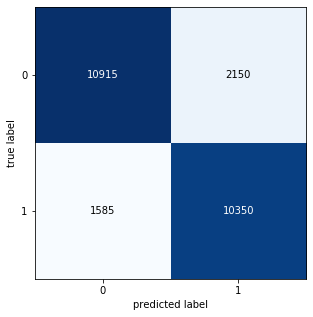

In [60]:
conf_mat_nn = confusion_matrix(nn_pred, target_label)
fig_nn, ax_nn = plot_confusion_matrix(conf_mat=conf_mat_nn,figsize=(5,5))
plt.show()

In [61]:
import pickle

In [62]:
saved_model_nn_tfidf = pickle.dumps(nn_model_tfidf)

## Implementing Word2Vec from Gensim

In [28]:
import gensim

In [38]:
from gensim.models import Word2Vec

In [60]:
lem_train = lemmatized_reviews_train.copy()

In [62]:
for i, sentence in enumerate(lem_train):
    tokenized_1 = []
    for word in sentence.split(' '):
        word = word.split(',')[0]
        tokenized_1.append(word)
    lem_train[i] = tokenized_1

In [101]:
print(lem_train[0])

['story', 'man', 'unnatural', 'feeling', 'pig', 'start', 'opening', 'scene', 'terrific', 'example', 'absurd', 'comedy', 'formal', 'orchestra', 'audience', 'turned', 'insane', 'violent', 'mob', 'crazy', 'chanting', 'singer', 'unfortunately', 'stay', 'absurd', 'whole', 'time', 'general', 'narrative', 'eventually', 'making', 'putting', 'even', 'era', 'turned', 'cryptic', 'dialogue', 'would', 'make', 'shakespeare', 'seem', 'easy', 'third', 'grader', 'technical', 'level', 'better', 'might', 'think', 'good', 'cinematography', 'future', 'great', 'vilmos', 'zsigmond', 'future', 'star', 'sally', 'kirkland', 'frederic', 'forrest', 'seen', 'briefly']


### Create word2vec model

In [96]:
word2vec_model = Word2Vec(lem_train, workers = 3, size = 50, min_count = 1, window = 3, sg = 1)

In [97]:
word2vec_model.wv.most_similar('terrific')

[('exceptional', 0.9105460047721863),
 ('outstanding', 0.9096971750259399),
 ('marvelous', 0.9092910289764404),
 ('excellent', 0.9059677124023438),
 ('great', 0.9000802040100098),
 ('fabulous', 0.8975570201873779),
 ('fine', 0.8904979228973389),
 ('marvellous', 0.889639139175415),
 ('superlative', 0.8894743919372559),
 ('fantastic', 0.8834149241447449)]

In [98]:
word2vec_model.wv.most_similar('terrible')

[('horrible', 0.9570490121841431),
 ('awful', 0.9393264055252075),
 ('abysmal', 0.935506284236908),
 ('horrendous', 0.927490234375),
 ('dreadful', 0.9203273057937622),
 ('horrid', 0.9187706708908081),
 ('atrocious', 0.9127136468887329),
 ('wretched', 0.9009042382240295),
 ('dire', 0.8820762634277344),
 ('sucked', 0.8804844617843628)]

In [103]:
word2vec_model.wv.similarity('great','awesome')

0.8286703

In [114]:
word2vec_model.wv.similarity('worst','chair')

0.33597535

In [99]:
print("Vocabulary size: {}".format(len(word2vec_model.wv.vocab)))

Vocabulary size: 86475


In [102]:
word2vec_model.vector_size

50

In [92]:
lem_test = lemmatized_reviews_test.copy()

In [93]:
for i, sentence in enumerate(lem_test):
    tokenized_2 = []
    for word in sentence.split(' '):
        word = word.split(',')[0]
        tokenized_2.append(word)
    lem_test[i] = tokenized_2

In [95]:
print(lem_test[0])

['mr', 'costner', 'dragged', 'movie', 'far', 'longer', 'necessary', 'aside', 'terrific', 'sea', 'rescue', 'sequence', 'care', 'character', 'u', 'ghost', 'closet', 'costners', 'character', 'realized', 'early', 'forgotten', 'much', 'later', 'time', 'care', 'character', 'really', 'care', 'cocky', 'overconfident', 'ashton', 'kutcher', 'problem', 'come', 'kid', 'think', 'he', 'better', 'anyone', 'else', 'around', 'show', 'sign', 'cluttered', 'closet', 'obstacle', 'appears', 'winning', 'costner', 'finally', 'well', 'past', 'half', 'way', 'point', 'stinker', 'costner', 'tell', 'u', 'kutchers', 'ghost', 'told', 'kutcher', 'driven', 'best', 'prior', 'inkling', 'foreshadowing', 'magic', 'could', 'keep', 'turning', 'hour']


### Calculate sentence vectors using the word2vec model

In [122]:
res = []
for sentence in lem_train:
    sentence_vectors = np.array([word2vec_model[token] for token in sentence])
    mean_values = np.mean(sentence_vectors, axis=0)
res.append(mean_values)

In [124]:
res[0]

array([ 0.38104385, -0.44952896,  0.25337642,  0.32768905, -0.00606357,
        0.09828613,  0.01879919,  0.35495302, -0.31736574,  0.17353198,
        0.3165656 , -0.27051362,  0.21134481, -0.3051421 ,  0.10668591,
        0.19478637,  0.31447473,  0.14214855, -0.79690915, -0.30942753,
        0.10540593,  0.02995077, -0.02301975, -0.41130224, -0.22889072,
       -0.17975736,  0.01317331, -0.31977576,  0.19489793, -0.1821324 ,
       -0.14876673,  0.42580447,  0.3380368 ,  0.2716853 ,  0.41068748,
        0.15025261,  0.06449486, -0.26747286, -0.2613322 ,  0.37052867,
        0.04148499,  0.14894351, -0.4384459 , -0.59139276, -0.13014454,
       -0.02076569, -0.11877716, -0.5947032 ,  0.10769217,  0.41534463],
      dtype=float32)